# AIT Development notebook

## notebook of structure

| #  | Name                                               | cells | for_dev | edit               | description                                                                |
|----|----------------------------------------------------|-------|---------|--------------------|----------------------------------------------------------------------------|
| 1  | [Environment detection](##1-Environment-detection) | 1     | No      | uneditable         | detect whether the notebook are invoked for packaging or in production     |
| 2  | [Preparing AIT SDK](##2-Preparing-AIT-SDK)         | 1     | Yes     | uneditable         | download and install AIT SDK                                               |
| 3  | [Dependency Management](##3-Dependency-Management) | 3     | Yes     | required(cell #2)  | generate requirements.txt for Docker container                             |
| 4  | [Importing Libraries](##4-Importing-Libraries)     | 2     | Yes     | required(cell #1)  | import required libraries                                                  |
| 5  | [Manifest Generation](##5-Manifest-Generation)     | 1     | Yes     | required           | generate AIT Manifest                                                      |
| 6  | [Prepare for the Input](##6-Prepare-for-the-Input) | 1     | Yes     | required           | generate AIT Input JSON (inventory mapper)                                 |
| 7  | [Initialization](##7-Initialization)               | 1     | No      | uneditable         | initialization for AIT execution                                           |
| 8  | [Function definitions](##8-Function-definitions)   | N     | No      | required           | define functions invoked from Main area.<br> also define output functions. |
| 9  | [Main Algorithms](##9-Main-Algorithms)             | 1     | No      | required           | area for main algorithms of an AIT                                         |
| 10 | [Entry point](##10-Entry-point)                    | 1     | No      | uneditable         | an entry point where Qunomon invoke this AIT from here                     |
| 11 | [License](##11-License)                            | 1     | Yes     | required           | generate license information                                               |
| 12 | [Deployment](##12-Deployment)                      | 1     | Yes     | uneditable         | convert this notebook to the python file for packaging purpose             |

## notebook template revision history

1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

1.0.0 2020/10/12

* new cerarion

## body

### #1 Environment detection

[uneditable]

In [1]:
# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

### #2 Preparing AIT SDK

[uneditable]

In [2]:
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install -q --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

### #3 Dependency Management

#### #3-1 [uneditable]

In [3]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

#### #3-2 [required]

In [4]:
if not is_ait_launch:
    requirements_generator.add_package('pandas', '2.0.3')
    requirements_generator.add_package('seaborn', '0.13.2')
    requirements_generator.add_package('opencv-python', '4.9.0.80')
    requirements_generator.add_package('numpy', '1.22.0')
    requirements_generator.add_package('matplotlib', '3.7.3')
    requirements_generator.add_package('scikit-learn', '1.3.2')
    requirements_generator.add_package('scipy', '1.10.1')

#### #3-3 [uneditable]

In [5]:
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -q -r $requirements_path 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 2.12.5 requires nbformat>=5.3.0, but you have nbformat 5.2.0 which is incompatible.


### #4 Importing Libraries

#### #4-1 [required]

In [6]:
if not is_ait_launch:
    !apt-get update && \
     apt-get -qq -y install libgl1-mesa-dev libglib2.0-0


Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease                     
Hit:2 http://security.ubuntu.com/ubuntu focal-security InRelease           
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Fetched 114 kB in 2s (56.0 kB/s)
Reading package lists... Done
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package libelf1:amd64.
(Reading database ... 18180 files and directories currently installed.)
Preparing to unpack .../00-libelf1_0.176-1.1ubuntu0.1_amd64.deb ...
Unpacking libelf1:amd64 (0.176-1.1ubuntu0.1) ...
Selecting previously unselected package libglib2.0-0:amd64.
Preparing to unpack .../01-libglib2.0-0_2.64.6-1~ubuntu20.04.6_amd64.deb ...
Unpacking libglib2.0-0:amd64 (2.64.6-1~ubuntu20.04.6) ...
Selecting previously unselected package libglib2.0-data.
Preparing to unpack .../02-libglib2.0-data_2.64.6-1~ubuntu20.04.6_all.deb ...


In [7]:
# import if you need modules cell

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
import seaborn as sns
import itertools
from sklearn import preprocessing
from os import path
import scipy

#### #4-2 [uneditable]

In [8]:
# must use modules
from os import path
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

### #5 Manifest Generation

[required]

In [9]:
if not is_ait_launch:
## sample ##
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_dataset_image_3features_kld')
    ait_description = (
        '2つの画像データ群を入力し、それらの明度、コントラスト、露光の分布についてKLD(KLダイバージェンス、KL情報量)を算出する。\n'
        'KLDが0に近いほど、2つの画像群は同じ特徴を再現していると評価できる。'
    )
    manifest_genenerator.set_ait_description(ait_description)
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_eval_dataset_image_3features_kld')
    manifest_genenerator.set_ait_version('0.3')
    manifest_genenerator.add_ait_keywords('KLD')
    manifest_genenerator.add_ait_keywords('image')
    manifest_genenerator.add_ait_keywords('brightness')
    manifest_genenerator.add_ait_keywords('contrast')
    manifest_genenerator.add_ait_keywords('exposure')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/B-1データセットの被覆性')
    
    inventory_requirement_data = manifest_genenerator.format_ait_inventory_requirement(format_=['*'])
    
    dataset_a_description = (
        '画像データ群AのZIPファイル\n'
        '・ディレクトリ唯一をZIP圧縮の対象とする\n'
        '・ディレクトリの直下にデータセットAのjpgファイルを全て格納する\n'
        '・ディレクトリの名称がxxxである場合、ZIPのファイル名はxxx.zipとする'
    )
    manifest_genenerator.add_ait_inventories(name='datasetA', 
                                             type_='dataset', 
                                             description=dataset_a_description, 
                                             requirement=manifest_genenerator.format_ait_inventory_requirement(format_=['zip']))

    dataset_b_description = (
        '画像データ群BのZIPファイル\n'
        '・ディレクトリ唯一をZIP圧縮の対象とする\n'
        '・ディレクトリの直下にデータセットBのjpgファイルを全て格納する\n'
        '・ディレクトリの名称がxxxである場合、ZIPのファイル名はxxx.zipとする'
    )
    manifest_genenerator.add_ait_inventories(name='datasetB', 
                                             type_='dataset', 
                                             description=dataset_b_description, 
                                             requirement=manifest_genenerator.format_ait_inventory_requirement(format_=['zip']))
    
    manifest_genenerator.add_ait_measures(name='KLD_of_brightness', 
                                          type_='float', 
                                          description='明度分布のKullback-Leibler divergenceの値', 
                                          structure='single')
    
    manifest_genenerator.add_ait_measures(name='KLD_of_contrast', 
                                        type_='float', 
                                        description='コントラスト分布のKullback-Leibler divergenceの値', 
                                        structure='single')

    manifest_genenerator.add_ait_measures(name='KLD_of_exposure', 
                                        type_='float', 
                                        description='露光分布のKullback-Leibler divergenceの値', 
                                        structure='single')
    
    manifest_genenerator.add_ait_resources(name='histogram_of_brightness_for_datasetA', 
                                           type_='picture', 
                                           description='datasetAの明度視点のヒストグラム')
    
    manifest_genenerator.add_ait_resources(name='histogram_of_brightness_for_datasetB', 
                                           type_='picture', 
                                           description='datasetBの明度視点のヒストグラム')
    
    manifest_genenerator.add_ait_resources(name='histogram_of_brightness_for_datasetA_and_datasetB', 
                                           type_='picture', 
                                           description='datasetA,Bの明度視点のヒストグラムをまとめて表示')
    
    manifest_genenerator.add_ait_resources(name='histogram_of_contrast_for_datasetA',
                                           type_='picture',
                                           description='datasetAのコントラストのヒストグラム')
    
    manifest_genenerator.add_ait_resources(name='histogram_of_contrast_for_datasetB',
                                           type_='picture',
                                           description='datasetBのコントラストのヒストグラム')
    
    manifest_genenerator.add_ait_resources(name='histogram_of_contrast_for_datasetA_and_datasetB',
                                           type_='picture',
                                           description='datasetA,Bのコントラストのヒストグラムをまとめて表示')
    
    manifest_genenerator.add_ait_resources(name='histogram_of_exposure_for_datasetA',
                                           type_='picture',
                                           description='datasetAの露光のヒストグラム')
    
    manifest_genenerator.add_ait_resources(name='histogram_of_exposure_for_datasetB',
                                           type_='picture',
                                           description='datasetBの露光のヒストグラム')
    
    manifest_genenerator.add_ait_resources(name='histogram_of_exposure_for_datasetA_and_datasetB',
                                           type_='picture',
                                           description='datasetA,Bの露光のヒストグラムをまとめて表示')
    
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

### #6 Prepare for the Input

[required]

In [10]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='datasetA',
                                        value='datasetA/aug_train.zip')
    input_generator.add_ait_inventories(name='datasetB',
                                        value='datasetB/aug_test.zip')
    input_generator.write()

### #7 Initialization

[uneditable]

In [11]:
logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

### #8 Function definitions

[required]

In [12]:
# データセット名
datasetA_name = 'datasetA'
datasetB_name = 'datasetB'

In [13]:
# 出力ファイル名
hist_brightness_datasetAB_name = 'hist_brightness_datasetA_and_B.png'
hist_brightness_datasetA_name  = 'hist_brightness_datasetA.png'
hist_brightness_datasetB_name  = 'hist_brightness_datasetB.png'

hist_contrast_datasetAB_name = 'hist_contrast_datasetA_and_B.png'
hist_contrast_datasetA_name  = 'hist_contrast_datasetA.png'
hist_contrast_datasetB_name  = 'hist_contrast_datasetB.png'

hist_exposure_datasetAB_name = 'hist_exposure_datasetA_and_B.png'
hist_exposure_datasetA_name  = 'hist_exposure_datasetA.png'
hist_exposure_datasetB_name  = 'hist_exposure_datasetB.png'

In [14]:
@log(logger)
def calc_KLD(data1, data2, bins=50, range_=(0.0, 1.0), epsilon=.00001):
    hist1, _ = np.histogram(data1, range=range_, bins=bins)
    hist2, _ = np.histogram(data2, range=range_, bins=bins)

    hist1 = (hist1+epsilon) / np.sum(hist1)
    hist2 = (hist2+epsilon) / np.sum(hist2)
    kld_value = np.sum([ai * np.log(ai / bi) for ai, bi in zip(hist1, hist2)])

    return kld_value

In [15]:
@log(logger)
@measures(ait_output, 'KLD_of_brightness')
def submit_KLD_of_brightness(kld):
    return kld

@log(logger)
@measures(ait_output, 'KLD_of_contrast')
def submit_KLD_of_contrast(kld):
    return kld

@log(logger)
@measures(ait_output, 'KLD_of_exposure')
def submit_KLD_of_exposure(kld):
    return kld

In [16]:
@log(logger)
@resources(ait_output, path_helper, 'histogram_of_brightness_for_datasetA_and_datasetB', hist_brightness_datasetAB_name)
def save_brightness_histgram_datasetAB(df_marge, file_path: str=None) -> str:
    line_plot = sns.histplot(data=df_marge, x="brightness", hue="inventory")
    figure = line_plot.get_figure()
    plt.show()
    figure.savefig(file_path)

In [17]:
@log(logger)
@resources(ait_output, path_helper, 'histogram_of_brightness_for_datasetA', hist_brightness_datasetA_name)
def save_brightness_histgram_datasetA(s, file_path: str=None) -> str:
    fig = plt.figure()
    plt.hist(s, bins=100)
    plt.xlabel("brightness")
    plt.ylabel("count")
    plt.show()
    fig.savefig(file_path)

In [18]:
@log(logger)
@resources(ait_output, path_helper, 'histogram_of_brightness_for_datasetB', hist_brightness_datasetB_name)
def save_brightness_histgram_datasetB(s, file_path: str=None) -> str:
    fig = plt.figure()
    plt.hist(s, bins=100)
    plt.xlabel("brightness")
    plt.ylabel("count")
    plt.show()
    fig.savefig(file_path)

In [19]:
@log(logger)
@resources(ait_output, path_helper, 'histogram_of_contrast_for_datasetA_and_datasetB', hist_contrast_datasetAB_name)
def save_contrast_histgram_datasetAB(df_marge, file_path: str=None) -> str:
    line_plot = sns.histplot(data=df_marge, x="contrast", hue="inventory")
    figure = line_plot.get_figure()
    plt.show()
    figure.savefig(file_path)

In [20]:
@log(logger)
@resources(ait_output, path_helper, 'histogram_of_contrast_for_datasetA', hist_contrast_datasetA_name)
def save_contrast_histgram_datasetA(contrast_list, file_path: str=None) -> str:
    fig = plt.figure()
    plt.hist(contrast_list, bins=100)
    plt.xlabel("Michelson contrast")
    plt.ylabel("count")
    plt.show()
    fig.savefig(file_path)

In [21]:
@log(logger)
@resources(ait_output, path_helper, 'histogram_of_contrast_for_datasetB', hist_contrast_datasetB_name)
def save_contrast_histgram_datasetB(contrast_list, file_path: str=None) -> str:
    fig = plt.figure()
    plt.hist(contrast_list, bins=100)
    plt.xlabel("Michelson contrast")
    plt.ylabel("count")
    plt.show()
    fig.savefig(file_path)

In [22]:
@log(logger)
@resources(ait_output, path_helper, 'histogram_of_exposure_for_datasetA_and_datasetB', hist_exposure_datasetAB_name)
def save_exposure_histgram_datasetAB(df_marge, file_path: str=None) -> str:
    line_plot = sns.histplot(data=df_marge, x="exposure", hue="inventory")
    figure = line_plot.get_figure()
    plt.show()
    figure.savefig(file_path)

In [23]:
@log(logger)
@resources(ait_output, path_helper, 'histogram_of_exposure_for_datasetA', hist_exposure_datasetA_name)
def save_exposure_histgram_datasetA(exposure_list, file_path: str=None) -> str:
    fig = plt.figure()
    plt.hist(exposure_list, bins=100)
    plt.xlabel("exposure")
    plt.ylabel("count")
    plt.show()
    fig.savefig(file_path)

In [24]:
@log(logger)
@resources(ait_output, path_helper, 'histogram_of_exposure_for_datasetB', hist_exposure_datasetB_name)
def save_exposure_histgram_datasetB(exposure_list, file_path: str=None) -> str:
    fig = plt.figure()
    plt.hist(exposure_list, bins=100)
    plt.xlabel("exposure")
    plt.ylabel("count")
    plt.show()
    fig.savefig(file_path)

In [25]:
@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

In [26]:
#WORKPATH = './work/' # zip解凍先
WORKPATH = './' # zip解凍先

In [27]:
def bright(image):
    #  BGR 2 HLS
    fImg = image.astype(np.float32)
    fImg = fImg / 255.0
    #HLS: channel0-Hue、channel1-lightness、channel2-saturation

    hlsImg = cv2.cvtColor(fImg, cv2.COLOR_BGR2HLS)
    brightness = hlsImg[:, :, 1]
    return brightness

def contrast(brightness: np.ndarray):
    # Michelson contrast
    l_max = brightness.max()
    l_min = brightness.min()
    contrast_val = (l_max-l_min) / (l_max+l_min)
    return contrast_val

def exposure(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    exposure_val = cv2.mean(gray)[0]
    return exposure_val

### #9 Main Algorithms

[required]

In [28]:
#########################################
# area:functions
# should edit
#########################################
@log(logger)
@ait_main(ait_output, path_helper, is_ait_launch)
def main() -> None:
    # from AIT parameter
    datasetA_path = ait_input.get_inventory_path(datasetA_name)
    datasetB_path = ait_input.get_inventory_path(datasetB_name)
    
    # 拡張子無しのインベントリファイル名
    datasetA_name_without_zip = os.path.splitext(os.path.basename(datasetA_path))[0]
    datasetB_name_without_zip = os.path.splitext(os.path.basename(datasetB_path))[0]
    
    # 入力インベントリごとに関連ディレクトリをまとめる
    # inventory_name_list=[datasetA_name, datasetB_name]
    inventory_name_list=[datasetA_name_without_zip, datasetB_name_without_zip]
    inventory_list=[datasetA_path, datasetB_path]
    png_list=[hist_brightness_datasetA_name, hist_brightness_datasetB_name]
    
    ait_dataset_list = []
    for name, data_path, png_path in zip(inventory_name_list, inventory_list, png_list):
        ait_dataset_list+=[{'name':name,
                            'path':data_path, 
                            'unzippath':WORKPATH + name,
                            'resultpath':WORKPATH + name + '.csv'
                           }]
    
    ## DataLoad
    for inv in ait_dataset_list:
        shutil.unpack_archive(inv['path'], WORKPATH)
    
    ## 明度計算
    drop_s_length = len(WORKPATH)

    for inv in ait_dataset_list:
        print(inv['name'])
        path       = inv['path']
        unzippath  = inv['unzippath']
        resultpath = inv['resultpath']

        brval=[]
        cgval=[]
        eval=[]
        img_shortpath=[]
        contrast_list = []
        exposure_list = []

        # jpgファイルを取得
        imgpath = glob(unzippath + '/*.jpeg')
        imgpath += glob(unzippath + '/*.jpg')
        
        for idx in range(len(imgpath)):
            img = cv2.imread(imgpath[idx])
            brightness = bright(img)
            mean_brightness = np.mean(brightness)
            brval.append(mean_brightness)
            contrast_value = contrast(brightness)
            contrast_list.append(contrast_value)
            exposure_value = exposure(img)
            exposure_list.append(exposure_value)
            img_shortpath.append(imgpath[idx][drop_s_length:]) # WORKPATHを除外

        dataframe=pd.DataFrame({'brval': brval, 'contrast': contrast_list, 'exposure': exposure_list, 'imgpath': img_shortpath})
        dataframe.to_csv(resultpath,index=False,sep=',')
    
    ## ヒストグラム出力
    # histgram_datasetA
    inv = ait_dataset_list[0]
    df_result = pd.read_csv(inv['resultpath'])
    save_brightness_histgram_datasetA(df_result['brval'])
    save_contrast_histgram_datasetA(df_result['contrast'])
    save_exposure_histgram_datasetA(df_result['exposure'])

    # histgram_datasetB
    inv = ait_dataset_list[1]
    df_result = pd.read_csv(inv['resultpath'])
    save_brightness_histgram_datasetB(df_result['brval'])
    save_contrast_histgram_datasetB(df_result['contrast'])
    save_exposure_histgram_datasetB(df_result['exposure'])

    ## ヒストグラム(まとめ)出力
    df_marge = pd.DataFrame(columns=list(pd.read_csv(inv['resultpath']).columns)+['name'])
    for inv in ait_dataset_list:    
        df_tmp = pd.read_csv(inv['resultpath'])
        df_tmp['name'] = inv['name']
        df_marge = pd.concat([df_marge, df_tmp])
        
    df_marge.reset_index(inplace=True, drop=True)
    df_marge = df_marge.rename(columns={'brval': 'brightness','name': 'inventory'})
    save_brightness_histgram_datasetAB(df_marge)
    save_contrast_histgram_datasetAB(df_marge)
    save_exposure_histgram_datasetAB(df_marge)

    ## KLD計算
    data_a = pd.read_csv(ait_dataset_list[0]['resultpath'])
    data_b = pd.read_csv(ait_dataset_list[1]['resultpath'])

    key = 'brval'
    kld = calc_KLD(data_a[key], data_b[key])
    submit_KLD_of_brightness(kld)
    print(f'KLD_of_brightness={kld}')

    key = 'contrast'
    kld = calc_KLD(data_a[key], data_b[key])
    submit_KLD_of_contrast(kld)
    print(f'KLD_of_{key}={kld}')

    key = 'exposure'
    x_min = min(data_a[key].min(), data_b[key].min())
    x_max = min(data_a[key].max(), data_b[key].max())
    kld = calc_KLD(data_a[key], data_b[key], range_=(x_min, x_max))
    submit_KLD_of_exposure(kld)
    print(f'KLD_of_{key}={kld}')
    
    move_log()
    

### #10 Entry point

[uneditable]

aug_train
aug_test


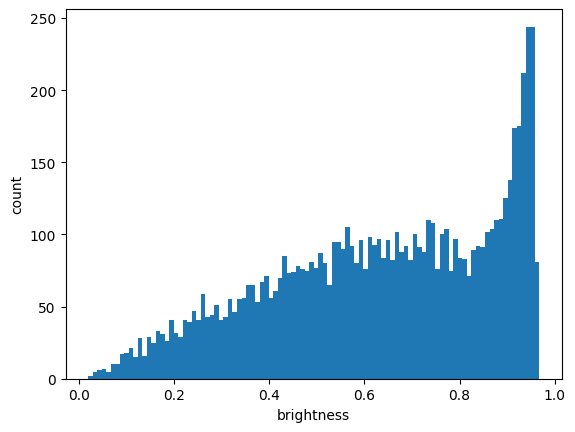

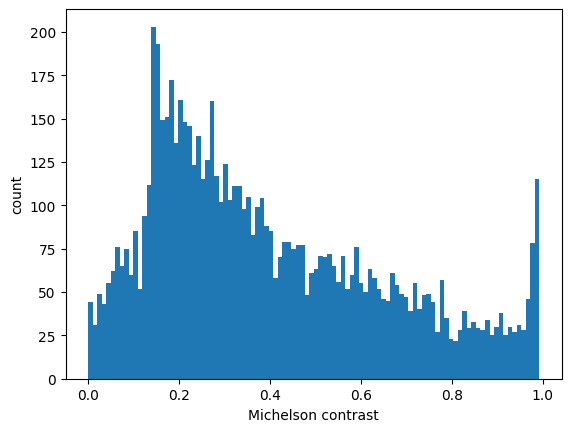

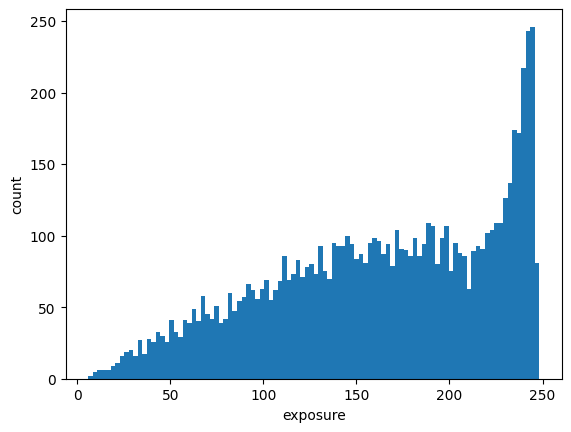

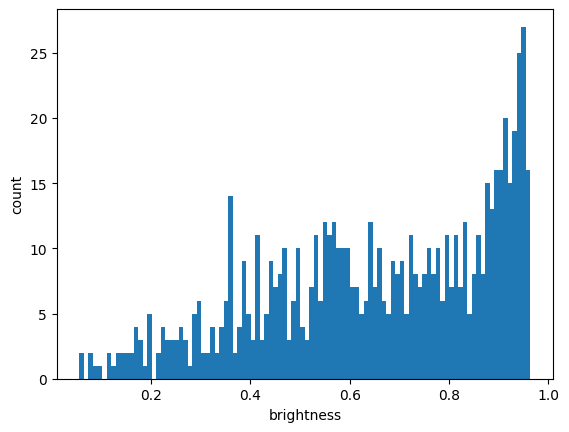

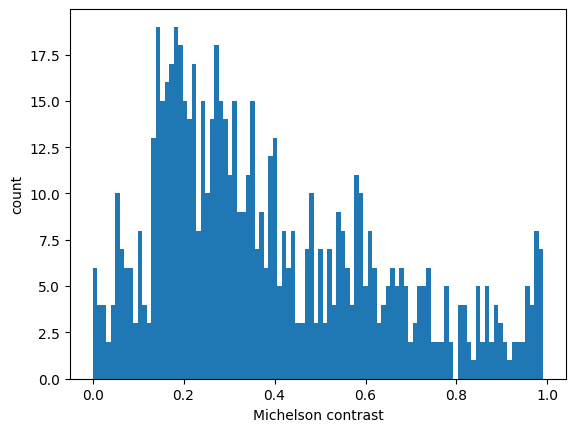

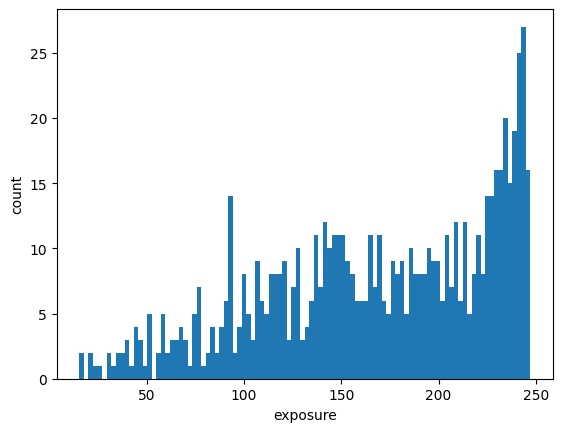

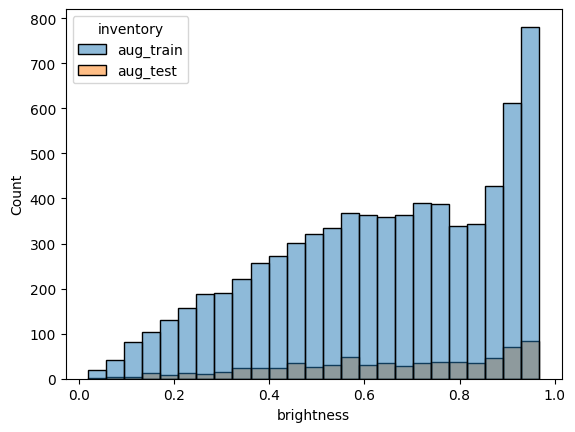

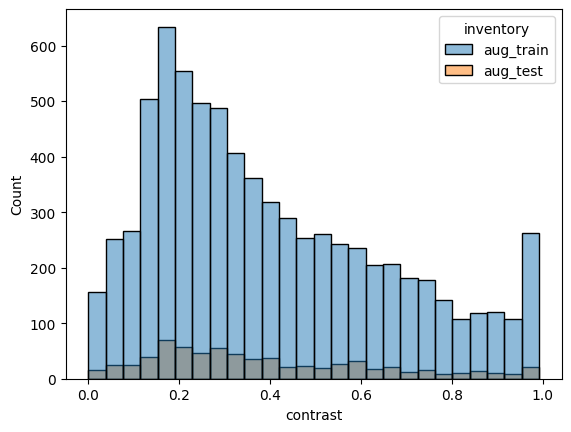

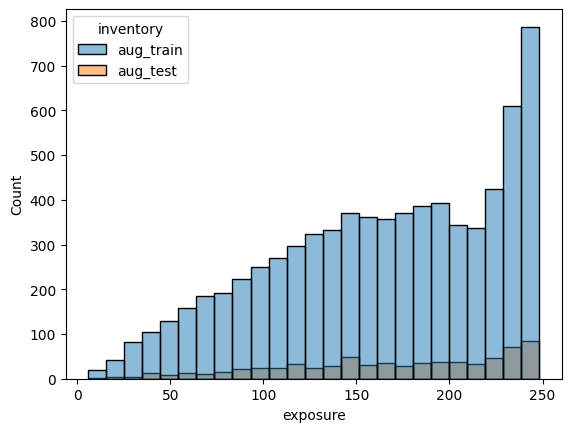

KLD_of_brightness=0.04759208671297619
KLD_of_contrast=0.03851087755711195
KLD_of_exposure=0.042376917934659225


In [29]:
if __name__ == '__main__':
    main()

### #11 License

[required]

In [30]:
## sample ##
ait_owner='AIST'
ait_creation_year='2024'

### #12 Deployment

[uneditable] 

In [31]:
if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
